# Machine learning, a tutorial, part II


## 2-1 Data Pre-processing

In [1]:
## import packages
import pandas as pd
import numpy as np

## some setting for better reading experience
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)

##  
randomState = 8

In [2]:
## read data 
melb = pd.read_csv("data/melb_training_data.csv").sample(frac=1, random_state=randomState).reset_index(drop=True)
melb.drop(columns = ["Unnamed: 0"], inplace=True)

## the train/test split is done at first
## but if you want to do some data processing, it should be split later for convience
#melb_test = melb[9000:]
#melb = melb[:9000]

### 2-1-1 Missing Values
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [3]:
## There are 11000 rows in the melb data frame
## columns with counts lower than 11000 contains missing value
## so Car, BuildingArea, YearBuilt.....etc... need to be dealing with
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,11000.0000,11000.0000,11000.0000,11000.0000,11000.0000,11000.0000,10949.0000,11000.0000,5765.0000,6635.0000,11000.0000,11000.0000,11000.0000
mean,2.9424,1078413.3030,10.1287,3105.2545,2.9163,1.5358,1.6075,567.4386,153.3545,1964.6579,-37.8092,144.9951,7465.4192
std,0.9587,642309.6171,5.8545,89.9783,0.9589,0.6928,0.9580,4351.9344,598.4962,36.3485,0.0791,0.1036,4395.1523
min,1.0000,85000.0000,0.0000,3000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1830.0000,-38.1825,144.4318,249.0000
25%,2.0000,650000.0000,6.1000,3044.0000,2.0000,1.0000,1.0000,178.0000,93.0000,1940.0000,-37.8568,144.9293,4380.0000
50%,3.0000,905000.0000,9.2000,3084.0000,3.0000,1.0000,2.0000,444.0000,127.0000,1970.0000,-37.8028,145.0004,6567.0000
75%,3.0000,1340000.0000,13.0000,3148.0000,3.0000,2.0000,2.0000,651.0000,174.0000,1999.0000,-37.7567,145.0575,10331.0000
max,10.0000,9000000.0000,48.1000,3977.0000,10.0000,8.0000,10.0000,433014.0000,44515.0000,2018.0000,-37.4539,145.5264,21650.0000


In [4]:
## To check where are missing values, use .isna()
## for example, the first 4 rows' BuildingArea are missing
melb.head().isna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
## The treatment no.1: drop it with dropna
## which is bad in many circumstances

## with dataframe.dropna, "axis = 0" and "axis=1" have different meaning
## axis=0: drop all ROWS with missing value
melb.head().dropna(axis=0)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Murrumbeena,49 Dalny Rd,3,h,1100000.0000,VB,hockingstuart,27/06/2016,12.1000,3163.0000,3.0000,2.0000,2.0000,506.0000,169.0000,1950.0000,Glen Eira,-37.9020,145.0705,Southern Metropolitan,4442.0000


In [6]:
## axis=1: drop all COLUMNS with missing value
melb.head().dropna(axis=1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Kew,27 Earl St,3,h,1410000.0000,PI,Fletchers,24/09/2016,5.6000,3101.0000,3.0000,1.0000,1.0000,519.0000,Boroondara,-37.7960,145.0377,Southern Metropolitan,10331.0000
1,Hoppers Crossing,2 Dunk Ct,3,h,418000.0000,S,Ray,27/05/2017,18.4000,3029.0000,3.0000,2.0000,1.0000,435.0000,Wyndham,-37.8677,144.6841,Western Metropolitan,13830.0000
2,Sunshine,17 Leonard St,3,h,850000.0000,S,Douglas,18/06/2016,12.6000,3020.0000,3.0000,1.0000,2.0000,505.0000,Brimbank,-37.7798,144.8352,Western Metropolitan,3755.0000
3,Albert Park,102 Graham St,3,h,2155000.0000,S,RT,8/04/2017,3.3000,3206.0000,3.0000,2.0000,0.0000,130.0000,Port Phillip,-37.8453,144.9490,Southern Metropolitan,3280.0000
4,Murrumbeena,49 Dalny Rd,3,h,1100000.0000,VB,hockingstuart,27/06/2016,12.1000,3163.0000,3.0000,2.0000,2.0000,506.0000,Glen Eira,-37.9020,145.0705,Southern Metropolitan,4442.0000


In [7]:
## The treatment no.2: fill with values with fillna
## take BuildingArea for example

melb_missing_values = melb.head()[["BuildingArea"]]
melb_missing_values

,BuildingArea
0,NaN
1,NaN
2,NaN
3,NaN
4,169.0000


In [8]:
## with fillna, any value can be specified to replace the NaN in columns
melb_missing_values.BuildingArea.fillna(0)

0     0.0000
1     0.0000
2     0.0000
3     0.0000
4   169.0000
Name: BuildingArea, dtype: float64

In [9]:
## you can fill the missing spots with population mean
mean_melb_BuildingArea = melb.BuildingArea.mean()
print("The population mean of BuildingArea is: {}".format(mean_melb_BuildingArea))

melb_missing_values.BuildingArea.fillna(mean_melb_BuildingArea)


The population mean of BuildingArea is: 153.35445510841285


0   153.3545
1   153.3545
2   153.3545
3   153.3545
4   169.0000
Name: BuildingArea, dtype: float64

In [10]:
## Other fillna methods. not quite useful in our case
## Can you figure out what are they doing?

print(melb_missing_values.BuildingArea.fillna(method="ffill"))
print(melb_missing_values.BuildingArea.fillna(method="bfill"))

0        NaN
1        NaN
2        NaN
3        NaN
4   169.0000
Name: BuildingArea, dtype: float64
0   169.0000
1   169.0000
2   169.0000
3   169.0000
4   169.0000
Name: BuildingArea, dtype: float64


In [11]:
## No matter what value you're trying to use
## you can replace the column with filled version
## in the fillna(), arguement "inplace=True" can replace value, too
## but personally I don't like in place operations

melb_missing_values["BuildingArea"] = melb_missing_values.BuildingArea.fillna(0)
melb_missing_values

##

,BuildingArea
0,0.0000
1,0.0000
2,0.0000
3,0.0000
4,169.0000


### 2-1-2 Categorical Variables
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [12]:
## Last week, I showed you the first way to deal with categorical variable:
## create a factorized column
melb["Regionname_factor"] = pd.factorize(melb.Regionname)[0]
melb[["Regionname", "Regionname_factor"]].head(10)


,Regionname,Regionname_factor
0,Southern Metropolitan,0
1,Western Metropolitan,1
2,Western Metropolitan,1
3,Southern Metropolitan,0
4,Southern Metropolitan,0
5,Southern Metropolitan,0
6,Western Metropolitan,1
7,Western Metropolitan,1
8,Northern Metropolitan,2
9,Western Metropolitan,1


In [13]:
## The famous one-hot encoding
## Regionname has 8 unique values, so there are 8 columns generated
melb_Regionname_one_hots = pd.get_dummies(melb.Regionname)
melb_Regionname_one_hots

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10995,0,0,0,0,0,0,1,0
10996,0,0,0,0,0,1,0,0
10997,0,0,0,0,0,1,0,0
10998,0,0,0,0,0,1,0,0


In [14]:
## Join the new one-hot columns to the original data
## notice that the melb dataframe is remained the same (not join anything)
melb.join(melb_Regionname_one_hots)

##

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Regionname_factor,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,Kew,27 Earl St,3,h,1410000.0000,PI,Fletchers,24/09/2016,5.6000,3101.0000,3.0000,1.0000,1.0000,519.0000,NaN,NaN,Boroondara,-37.7960,145.0377,Southern Metropolitan,10331.0000,0,0,0,0,0,0,1,0,0
1,Hoppers Crossing,2 Dunk Ct,3,h,418000.0000,S,Ray,27/05/2017,18.4000,3029.0000,3.0000,2.0000,1.0000,435.0000,NaN,NaN,Wyndham,-37.8677,144.6841,Western Metropolitan,13830.0000,1,0,0,0,0,0,0,1,0
2,Sunshine,17 Leonard St,3,h,850000.0000,S,Douglas,18/06/2016,12.6000,3020.0000,3.0000,1.0000,2.0000,505.0000,NaN,1970.0000,Brimbank,-37.7798,144.8352,Western Metropolitan,3755.0000,1,0,0,0,0,0,0,1,0
3,Albert Park,102 Graham St,3,h,2155000.0000,S,RT,8/04/2017,3.3000,3206.0000,3.0000,2.0000,0.0000,130.0000,NaN,NaN,Port Phillip,-37.8453,144.9490,Southern Metropolitan,3280.0000,0,0,0,0,0,0,1,0,0
4,Murrumbeena,49 Dalny Rd,3,h,1100000.0000,VB,hockingstuart,27/06/2016,12.1000,3163.0000,3.0000,2.0000,2.0000,506.0000,169.0000,1950.0000,Glen Eira,-37.9020,145.0705,Southern Metropolitan,4442.0000,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,Airport West,44 Moorna Dr,4,t,950000.0000,S,Barry,12/08/2017,10.4000,3042.0000,4.0000,2.0000,1.0000,255.0000,NaN,NaN,Moonee Valley,-37.7257,144.8685,Western Metropolitan,3464.0000,1,0,0,0,0,0,0,1,0
10996,Glen Iris,4 Faircroft Av,3,h,1307500.0000,S,Jellis,19/08/2017,7.3000,3146.0000,3.0000,1.0000,1.0000,316.0000,111.0000,1940.0000,NaN,-37.8478,145.0500,Southern Metropolitan,10412.0000,0,0,0,0,0,0,1,0,0
10997,South Yarra,2/63 Domain St,3,u,920000.0000,S,Williams,13/05/2017,3.3000,3141.0000,3.0000,1.0000,1.0000,0.0000,NaN,1970.0000,Melbourne,-37.8360,144.9782,Southern Metropolitan,14887.0000,0,0,0,0,0,0,1,0,0
10998,Bentleigh East,25 Glover St,4,h,800000.0000,PI,Hodges,16/04/2016,13.9000,3165.0000,4.0000,2.0000,2.0000,601.0000,NaN,NaN,Glen Eira,-37.9278,145.0810,Southern Metropolitan,10969.0000,0,0,0,0,0,0,1,0,0


### 2-1-3 Non-linearity & Interaction

In [15]:
## This is too easy for you guys.....

## non-linear terms
## quadratic
melb["Distance_2"] = melb["Distance"] ** 2
## log
## watch out! the column you're trying to processing can be 0 or even negative!
melb["Distance_log"] = np.log(melb["Distance"])

## interactions
melb["DistanceXRooms"] = melb["Distance"] * melb["Rooms"]

melb[["Distance", "Rooms", "Distance_2", "Distance_log", "DistanceXRooms"]]



/Users/netiberks/opt/miniconda3/envs/cs224n/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Distance,Rooms,Distance_2,Distance_log,DistanceXRooms
0,5.6000,3,31.3600,1.7228,16.8000
1,18.4000,3,338.5600,2.9124,55.2000
2,12.6000,3,158.7600,2.5337,37.8000
3,3.3000,3,10.8900,1.1939,9.9000
4,12.1000,3,146.4100,2.4932,36.3000
...,...,...,...,...,...
10995,10.4000,4,108.1600,2.3418,41.6000
10996,7.3000,3,53.2900,1.9879,21.9000
10997,3.3000,3,10.8900,1.1939,9.9000
10998,13.9000,4,193.2100,2.6319,55.6000


In [16]:
## another way to deal with non-linearity:
## grouping

## take a look of the distribition of Distance
melb.Distance.describe()

count   11000.0000
mean       10.1287
std         5.8545
min         0.0000
25%         6.1000
50%         9.2000
75%        13.0000
max        48.1000
Name: Distance, dtype: float64

In [17]:
## cut it into 4 groups with pd.cut
## what is pd.cut's strategy?
pd.cut(melb.Distance, bins = 4)

0        (-0.0481, 12.025]
1          (12.025, 24.05]
2          (12.025, 24.05]
3        (-0.0481, 12.025]
4          (12.025, 24.05]
               ...        
10995    (-0.0481, 12.025]
10996    (-0.0481, 12.025]
10997    (-0.0481, 12.025]
10998      (12.025, 24.05]
10999    (-0.0481, 12.025]
Name: Distance, Length: 11000, dtype: category
Categories (4, interval[float64]): [(-0.0481, 12.025] < (12.025, 24.05] < (24.05, 36.075] < (36.075, 48.1]]

In [18]:
## this time, with pd.qcut
## what's the difference?
pd.qcut(melb.Distance, q=4)

##


0        (-0.001, 6.1]
1         (13.0, 48.1]
2          (9.2, 13.0]
3        (-0.001, 6.1]
4          (9.2, 13.0]
             ...      
10995      (9.2, 13.0]
10996       (6.1, 9.2]
10997    (-0.001, 6.1]
10998     (13.0, 48.1]
10999    (-0.001, 6.1]
Name: Distance, Length: 11000, dtype: category
Categories (4, interval[float64]): [(-0.001, 6.1] < (6.1, 9.2] < (9.2, 13.0] < (13.0, 48.1]]

In [19]:
## Recall the 5-variable linear regression I've showed you last week
## The R^2 on test data = 0.5369
## However, there are almost half of rows are not being predicted

## data
melb_train = melb[:9000]
melb_test = melb[9000:]

## Scikit-learn 
from sklearn.linear_model import LinearRegression

## select the features
features_in_model = ["Distance", "Rooms", "YearBuilt", "BuildingArea","Landsize"]
flawless_rows = melb_train[features_in_model].isna().sum(axis=1) == 0

X = melb_train.loc[flawless_rows, features_in_model]

## select the prediction target
y = melb_train.loc[flawless_rows, "Price"]

## Initiate a model with intercept (b_0)
lr_model = LinearRegression(fit_intercept=True)

## train the Linear regression model
lr_model.fit(X, y)


## on test data....
flawless_rows_test = melb_test[features_in_model].isna().sum(axis=1) == 0
X_test = melb_test.loc[flawless_rows_test, features_in_model]
y_test = melb_test.loc[flawless_rows_test, "Price"]

## overall performance on test data
print("R^2 on test data = {:.4f}".format(lr_model.score(X_test, y_test)))

## But remeber, you ignore so many rows.....
print("""Originally, there are {} rows in test data. 
By dropping rows with any missing value, {} are left.""".format(melb_test.shape[0], X_test.shape[0]))

R^2 on test data = 0.5369
Originally, there are 2000 rows in test data. 
By dropping rows with any missing value, 1002 are left.


In [20]:
## If the model cannot give me a prediction of the "flaw_rows"
## I can only replace the predicted values with mean Price in training data
## It's the best way when no further information from features


mean_melb_train_price = melb_train.Price.mean()

## concat the true y of both flawless and flaw rows
y_test_flaw = melb_test.loc[flawless_rows_test == False, "Price"]
y_test_full = y_test.append(y_test_flaw)

## concate the predicted y, 
## from model for flawless rows, from training data average for flaw rows 
y_test_pred_flawless = lr_model.predict(X_test)
y_test_pred_flaw = np.repeat(mean_melb_train_price, 998)
y_test_pred_full = np.concatenate((y_test_pred_flawless, y_test_pred_flaw))


In [21]:
## THE TRUE R^2 SHOULD BE MUCH LOWER!
from sklearn.metrics import r2_score
print("""R^2 on FLAWLESS test data: {:.4f}
R^2 on ALL test data: {:.4f}""".format(r2_score(y_test_full[:1002], 
                                                      y_test_pred_full[:1002]), 
                                                    r2_score(y_test_full, y_test_pred_full)))

R^2 on FLAWLESS test data: 0.5369
R^2 on ALL test data: 0.2655


In [25]:
## With all the data pre-processing tricks in this section
## Can I have all 2000 predicted values from the model and get a better result?


## select the features
features_in_model = ["Distance", "Rooms", "YearBuilt", "BuildingArea","Landsize"]
X = melb[features_in_model]

## set the target
y = melb["Price"]

## Obiously there are some missing in YearBuilt and BuildingArea
X.describe()



,Distance,Rooms,YearBuilt,BuildingArea,Landsize
count,11000.0000,11000.0000,6635.0000,5765.0000,11000.0000
mean,10.1287,2.9424,1964.6579,153.3545,567.4386
std,5.8545,0.9587,36.3485,598.4962,4351.9344
min,0.0000,1.0000,1830.0000,0.0000,0.0000
25%,6.1000,2.0000,1940.0000,93.0000,178.0000
50%,9.2000,3.0000,1970.0000,127.0000,444.0000
75%,13.0000,3.0000,1999.0000,174.0000,651.0000
max,48.1000,10.0000,2018.0000,44515.0000,433014.0000


In [26]:
## Missing value, replace with median in training data 
median_melb_YearBuilt = X[:9000].YearBuilt.median()
X["YearBuilt_filled"] = X["YearBuilt"].fillna(median_melb_YearBuilt)

median_melb_BuildingArea = X[:9000].BuildingArea.median() 
X["BuildingArea_filled"] = X["BuildingArea"].fillna(median_melb_BuildingArea)


## Categorical: Rooms as one-hot
one_hot_melb_Rooms = pd.get_dummies(X.Rooms)
## rename the confusing result
one_hot_melb_Rooms = one_hot_melb_Rooms.add_prefix("rooms_")
## concat
X = X.join(one_hot_melb_Rooms)

## non-liearity & interaction
X["Distance_2"] = X.Distance ** 2
X["DistanceXLandsize"] = X.Distance * X.Landsize



<ipython-input-26-e1e99436b777>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["YearBuilt_filled"] = X["YearBuilt"].fillna(median_melb_YearBuilt)
<ipython-input-26-e1e99436b777>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["BuildingArea_filled"] = X["BuildingArea"].fillna(median_melb_BuildingArea)


In [27]:
## Use the processed data

features_in_model_post_process = ["Distance", "Distance_2", "DistanceXLandsize",
                                 "YearBuilt_filled", "BuildingArea_filled", 
                                 "Landsize",
                                 'rooms_1', 'rooms_2','rooms_3', 'rooms_4', 'rooms_5',
                                  'rooms_6', 'rooms_7', 'rooms_8','rooms_10']


## split the train/test set
X = X[features_in_model_post_process]
X_train = X[:9000]
y_train = y[:9000]
X_test = X[9000:]
y_test = y[9000:]

## Initiate a model with intercept (b_0)
lr_model = LinearRegression(fit_intercept=True)

## train the Linear regression model
lr_model.fit(X_train, y_train)

## Evaluation! 
print("R^2 on training data = {:.4f}".format(lr_model.score(X_train, y_train)))
print("R^2 on test data = {:.4f}".format(lr_model.score(X_test, y_test)))

## 

R^2 on training data = 0.3917
R^2 on test data = 0.4019


## 2-2 Tree models

### 2-2-1 A show case

In [28]:
## Wait........ feel the burn......

## a new tree based model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

## all the same pipeline
print("With the same processed data as linear model:")
rf_model.fit(X_train, y_train)

print("R^2 on training data = {:.4f}".format(rf_model.score(X_train, y_train)))
print("R^2 on test data = {:.4f}".format(rf_model.score(X_test, y_test)))




With the same processed data as linear model:
R^2 on training data = 0.9415
R^2 on test data = 0.5913


In [29]:
## it just works!!

rf_model = RandomForestRegressor()

print("With the no-feature-engineering data (missing value only):")
rf_model.fit(melb_train[features_in_model].fillna(-1), melb_train["Price"])

print("R^2 on training data = {:.4f}".format(rf_model.score(melb_train[features_in_model].fillna(-1), 
                                                            melb_train["Price"])))
print("R^2 on test data = {:.4f}".format(rf_model.score(melb_test[features_in_model].fillna(-1), 
                                                        melb_test["Price"])))


##

With the no-feature-engineering data (missing value only):
R^2 on training data = 0.9389
R^2 on test data = 0.5719


### 2-2-2 What is a decision tree

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

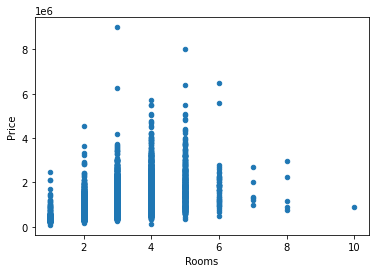

In [31]:
%matplotlib inline
melb_train.plot.scatter(x="Rooms", y="Price")

In [32]:
## The number of Rooms do have a relationship with Price
melb_train.groupby("Rooms").Price.mean()

Rooms
1     436783.6712
2     766250.1640
3    1083961.5606
4    1441791.5294
5    1856778.8557
6    1835843.7500
7    1594166.6667
8    1600200.0000
10    900000.0000
Name: Price, dtype: float64

In [33]:
## total variance of y ( = Var(y) * n)
## divided by 10 ** 10 for readability

total_y_variance = np.var(melb_train.Price) * melb_train.Price.size / 10**10
print("The total variance of y = {:.4f}".format(total_y_variance))

The total variance of y = 370189.4968


In [34]:
## Take cut point Rooms == 3 for example

## left side
total_y_variance_left = np.var(melb_train[melb_train.Rooms <= 3].Price) * melb_train[melb_train.Rooms <= 3].Price.size / 10**10
## right side
total_y_variance_right = np.var(melb_train[melb_train.Rooms > 3].Price) * melb_train[melb_train.Rooms > 3].Price.size / 10**10

print("""The sum of two grouped total variance of y = {:.4f},
the 'predictiveness' of cut point Rooms == 3 is {:.4f}""".format(total_y_variance_left + total_y_variance_right,
          total_y_variance - (total_y_variance_left + total_y_variance_right)))


The sum of two grouped total variance of y = 309754.4041,
the 'predictiveness' of cut point Rooms == 3 is 60435.0927


In [35]:
## Will Rooms == 4 better?

## left side
total_y_variance_left = np.var(melb_train[melb_train.Rooms <= 4].Price) * melb_train[melb_train.Rooms <= 4].Price.size / 10**10
## right side
total_y_variance_right = np.var(melb_train[melb_train.Rooms > 4].Price) * melb_train[melb_train.Rooms > 4].Price.size / 10**10

print("""The sum of two grouped total variance of y = {:.4f},
the 'predictiveness' of cut point Rooms == 4 is {:.4f}""".format(total_y_variance_left + total_y_variance_right,
          total_y_variance - (total_y_variance_left + total_y_variance_right)))

The sum of two grouped total variance of y = 341498.6959,
the 'predictiveness' of cut point Rooms == 4 is 28690.8009


In [36]:
## What if a totally useless cut point?
## index > 5000 ? XD

## left side
total_y_variance_left = np.var(melb_train[:5000].Price) * melb_train[:5000].Price.size / 10**10
## right side
total_y_variance_right = np.var(melb_train[5000:].Price) * melb_train[5000:].Price.size / 10**10

print("""The sum of two grouped total variance of y = {:.4f},
the 'predictiveness' of cut point index > 5000 is {:.4f}""".format(total_y_variance_left + total_y_variance_right,
          total_y_variance - (total_y_variance_left + total_y_variance_right)))

The sum of two grouped total variance of y = 370172.5524,
the 'predictiveness' of cut point index > 5000 is 16.9444


## 2-2-3 Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [37]:
## We already have a random forest model above
## just dig into it

## it is constructed by many DecisionTrees
rf_model.base_estimator_

DecisionTreeRegressor()

In [38]:
## 100 trees
rf_model.n_estimators

100

In [39]:
## As the manual shows, there are tons of hyperparameters to be set

rf_model = RandomForestRegressor(
    ## number of trees in forest, usually the more the better
    n_estimators = 300,
    ## these two controls the size of a tree = prune
    ## the depth is big means the tree is big
    ## the leaf is big means the tree is small (why?)
    max_depth = 10, 
    min_samples_leaf = 5,
    ## how many features can a decision tree use?
    max_features =  "sqrt",
    ## these two are the key of random forest
    bootstrap = True,
    oob_score = True,
    ## multi-processing
    n_jobs = 3,
    ## showing messeges
    verbose = 1
)

print("With the no-feature-engineering data (missing value only):")
rf_model.fit(melb_train[features_in_model].fillna(-1), melb_train["Price"])

print("R^2 on training data = {:.4f}".format(rf_model.score(melb_train[features_in_model].fillna(-1), 
                                                            melb_train["Price"])))
print("R^2 on test data = {:.4f}".format(rf_model.score(melb_test[features_in_model].fillna(-1), 
                                                        melb_test["Price"])))



With the no-feature-engineering data (missing value only):


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.8s finished


R^2 on training data = 0.6899
R^2 on test data = 0.5890


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


In [40]:
## Random forest offers an approximation of "R^2 on test set": oob score
print("""R^2 on test data (2000 rows) = {:.4f},
the oob score on training data (9000 rows) = {:.4f}""".format(rf_model.score(melb_test[features_in_model].fillna(-1), 
                                                        melb_test["Price"]), 
                                                                    rf_model.oob_score_))
##

R^2 on test data (2000 rows) = 0.5890,
the oob score on training data (9000 rows) = 0.6023


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished


In [41]:
rf_model.feature_importances_

array([0.23814949, 0.25388479, 0.11559315, 0.22075249, 0.17162008])

In [42]:
features_in_model

['Distance', 'Rooms', 'YearBuilt', 'BuildingArea', 'Landsize']

In [45]:
print("Feature improtance is this 5-variable model")
for p in zip(features_in_model, rf_model.feature_importances_):
    print("%s: %f" % (p[0], p[1]))

Feature improtance is this 5-variable model
Distance: 0.239627
Rooms: 0.243332
YearBuilt: 0.114133
BuildingArea: 0.229444
Landsize: 0.173464


In [43]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_model, 
    melb_test[features_in_model].fillna(-1), 
    melb_test["Price"], n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean, index=features_in_model)

forest_importances

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished


Distance       0.3306
Rooms          0.3360
YearBuilt      0.0763
BuildingArea   0.1509
Landsize       0.1423
dtype: float64

## 2-3 Model evaluation
https://scikit-learn.org/stable/modules/cross_validation.html

In [49]:
### of course you can make the Cross validation procedure by yourself
### define model, cut training data into k fold, choose k-1 to train and 1 for evaluation
### repeat this for n times.....



### or we can use a predefined procedure
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


rf_model_cv = RandomForestRegressor(
    n_estimators = 300,
    max_depth = 10, 
    min_samples_leaf = 5,
    max_features =  "sqrt",
    bootstrap = True,
    oob_score = True
)


# define evaluation procedure
rf_cv = RepeatedKFold(n_splits=5 , n_repeats=10, random_state=randomState)

# evaluate model
rf_cv_scores = cross_val_score(rf_model_cv, 
                         X = melb_train[features_in_model].fillna(-1), 
                         y = melb_train["Price"],
                         scoring='r2', 
                         cv=rf_cv, n_jobs=-1)
# summarize performance
print('Mean R^2: %.5f' % np.mean(rf_cv_scores))

Mean R^2: 0.59718


In [50]:
### best scenario for CV: hyperparameter tuning

rf_model_cv = RandomForestRegressor(
    n_estimators = 300,
    max_depth = 10, 
    min_samples_leaf = 10, ## from 5 to 10
    max_features =  "sqrt",
    bootstrap = True,
    oob_score = True
)


# define evaluation procedure
rf_cv = RepeatedKFold(n_splits=5 , n_repeats=10, random_state=randomState)

# evaluate model
rf_cv_scores = cross_val_score(rf_model_cv, 
                         X = melb_train[features_in_model].fillna(-1), 
                         y = melb_train["Price"],
                         scoring='r2', 
                         cv=rf_cv, n_jobs=-1)
# summarize performance
print('Mean R^2: %.5f' % np.mean(rf_cv_scores))


Mean R^2: 0.58738



## Homeworks
### How to......:

1. Fill BuildingArea's missing spots with grouped mean instead of population mean? (say, the grouping variable is Regionname)
2. One-hot a categorical variable with missing value?
3. Generate interaction terms between two categorical columns?
4. Find good hyperparameters for random forest or gbdt?

### Build models to compete on Kaggle!